How did you start Notebook
--------------------------

When starting this notebook using this:
```bash
~/tutorial-env/bin/ipython notebook --pylab=inline
```
comment out the code in the following cell.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Generate the data necessary to this project first.**

Generated input data is saved in: /tmp/tmpDQrOLj


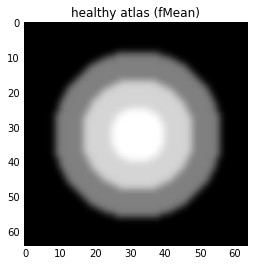

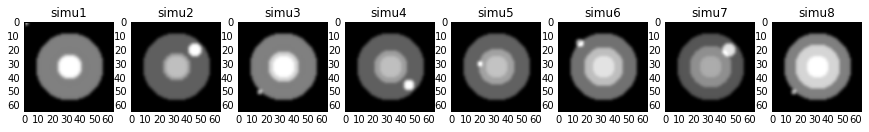

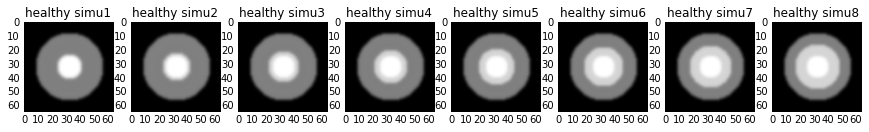

In [3]:
import tempfile
figure()
data_folder=tempfile.mkdtemp()
print "Generated input data is saved in: "+data_folder
%run ../../helper/gen_3D_simulation_data.py $data_folder

In [52]:
import numpy as np # Numpy for general purpose processing
import SimpleITK as sitk # SimpleITK to load images
import sys
import os
sys.path.append('../../')
from pyLAR.alm.ialm import recover # Candes et al.’s RPCA approach

In [53]:
# load first image
slice_nr = 30
im_names = ['healthySimu1.nrrd','healthySimu2.nrrd','healthySimu3.nrrd','healthySimu4.nrrd','healthySimu5.nrrd']#,'305.mha','306.mha','307.mha','309.mha','310.mha']  # 308 intensity range is too off
num_of_data = len(im_names)
tmp = sitk.ReadImage(os.path.join(data_folder,im_names[0])) # image in SITK format
tmp = sitk.GetArrayFromImage(tmp) # get numpy array
z_dim, x_dim, y_dim = tmp.shape # get 3D volume shape
print tmp.shape
tmp = tmp[slice_nr,:,:] # extract our slice
tmp = tmp.reshape(-1) # vectorize

(64, 64, 64)


In [54]:
Y = np.zeros((len(tmp), len(im_names)))
for i, im_file in enumerate(im_names):
    tmp = sitk.ReadImage(os.path.join(data_folder,im_file))
    tmp = sitk.GetArrayFromImage(tmp)
    tmp = tmp[slice_nr,:,:]
    Y[:,i] = tmp.reshape(-1)

In [55]:
gamma = 0.8* sqrt(float(Y.shape[1])/Y.shape[0])
low_rank, sparse, n_iter,rank, non_zero,sparsity = recover(Y,gamma)


[iter: 0000]: rank(P) = 0001, |C|_0 = 1785, crit=0.1172484851, total sparse =37983
[iter: 0010]: rank(P) = 0002, |C|_0 = 1778, crit=0.0022058104, total sparse =8666
[iter: 0020]: rank(P) = 0002, |C|_0 = 2887, crit=0.0000421786, total sparse =8785
[iter: 0030]: rank(P) = 0003, |C|_0 = 4125, crit=0.0000007132, total sparse =8788


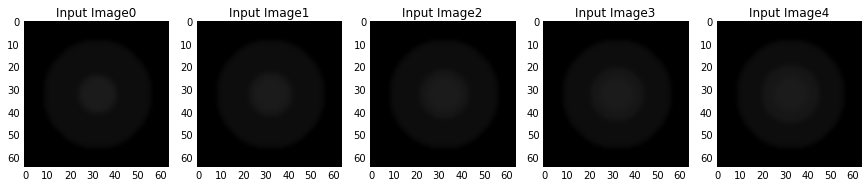

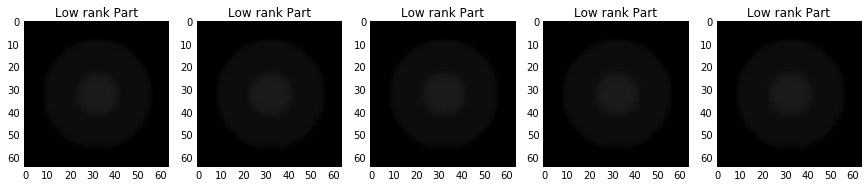

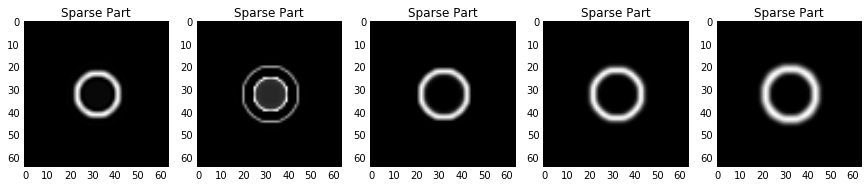

In [56]:
fig = plt.figure(figsize=(15,15))
for i in range(num_of_data):
    fig.add_subplot(1,num_of_data,i+1)
    implot = imshow(Y[:,i].reshape(x_dim,y_dim),cm.gray)
    plt.title('Input Image' + str(i))
    #plt.colorbar()
    implot.set_clim(0,560)
    
fig = plt.figure(figsize=(15,5))
for i in range(num_of_data):
    fig.add_subplot(1,num_of_data,i+1)
    implot =imshow(np.abs(low_rank[:,i].reshape(x_dim,y_dim)),cm.gray)
    plt.title('Low rank Part')
   # plt.colorbar()
    implot.set_clim(0,560)

fig = plt.figure(figsize=(15,5))
for i in range(num_of_data):
    fig.add_subplot(1,num_of_data,i+1)
    implot = imshow(np.abs(sparse[:,i].reshape(x_dim,y_dim)),cm.gray)
    plt.title('Sparse Part')
   # plt.colorbar()
    

In [57]:
lamda = 0.8
r = np.arange(0.1,1,.05)
print r
sparsity = zeros(r.size)
rank = zeros(r.size)
i = 0
for lamda in r:
    gamma = lamda * sqrt(float(Y.shape[1])/Y.shape[0])
    low_rank, sparse, n_iter,rank[i], non_zero, sparsity[i] = recover(Y,gamma)
    i = i+1

[ 0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65
  0.7   0.75  0.8   0.85  0.9   0.95]
[iter: 0000]: rank(P) = 0000, |C|_0 = 9465, crit=0.1380845978, total sparse =269926
[iter: 0010]: rank(P) = 0000, |C|_0 = 11165, crit=0.0003202409, total sparse =313623
[iter: 0020]: rank(P) = 0000, |C|_0 = 14165, crit=0.0000049694, total sparse =313670
[iter: 0030]: rank(P) = 0000, |C|_0 = 16295, crit=0.0000000870, total sparse =313670
[iter: 0000]: rank(P) = 0000, |C|_0 = 9065, crit=0.1991764482, total sparse =250625
[iter: 0010]: rank(P) = 0000, |C|_0 = 11085, crit=0.0004443026, total sparse =313604
[iter: 0020]: rank(P) = 0000, |C|_0 = 13745, crit=0.0000084590, total sparse =313669
[iter: 0030]: rank(P) = 0000, |C|_0 = 15855, crit=0.0000001769, total sparse =313670
[iter: 0000]: rank(P) = 0000, |C|_0 = 8945, crit=0.2575811348, total sparse =232293
[iter: 0010]: rank(P) = 0000, |C|_0 = 10785, crit=0.0006689294, total sparse =313581
[iter: 0020]: rank(P) = 0000, |C|_0 = 1366

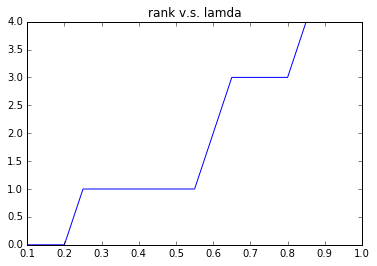

In [58]:
fig = plt.figure
plt.plot(r,rank)
plt.title('rank v.s. lamda')

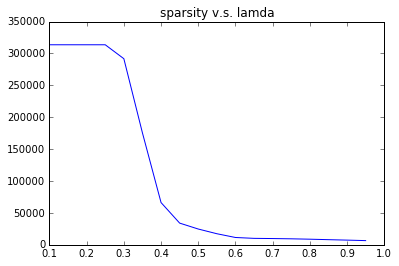

In [59]:
fig = plt.figure
plt.plot(r,sparsity)
plt.title('sparsity v.s. lamda')